# Marsquakes: Analyzing seismic activity on Mars

In this notebook we will obtain seismic data from NASA's Interior Exploration using Seismic Investigations, Geodesy and Heat Transport (InSight) mission, a robotic lander designed to study the interior of Mars.

## Import

In [186]:
from datetime import datetime, timedelta
from obspy import read_events
from math import pi, floor, ceil
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Data

In the next code block we will manually input the R1, R2, & R3 gathered from [NASA InSight in IRIS](http://ds.iris.edu/ds/nodes/dmc/tools/mars-events/). We will use these times to find the distance of the origin of the quake from the station (ELYSE) and use that as a search radius for quakes.

In [178]:
# R1, R2, R3 of May 4th mag-4.6 quake
R1 = datetime(2022, 5, 4, 23, 35, 58)
R2 = datetime(2022, 5, 5, 1, 14, 5)
R3 = datetime(2022, 5, 5, 1, 38, 57)

T = (R3 - R2) / 2 # time from origin to station
Tcircle = R3 - R1 # time around the planet

event_time = R1 - T # origin time of the event

V = 2 * pi / (Tcircle.seconds) # velocity in radians per second

D = V * T.seconds # distance from origin to station in radians

# convert to degrees and round fuzzy ±1
Dmin = floor(D * (180 / pi) - 1)
Dmax = ceil(D * (180 / pi) + 1)

# read events in
# ELYSE 4.502384, 135.623447
catalog = read_events('https://service.iris.edu/irisws/mars-event/1/query?starttime=2018-11-26T00:00:00&endtime=2022-12-15T23:59:59&magnitudetype=MW&latitude=4.5024&longitude=135.6234&minradius=' + str(Dmin) +'&maxradius=' + str(Dmax))

Since there's only one event, we don't need to do any other filtering.

In [187]:
event = catalog.events[0]

ELYSE_lon, ELYSE_lat = 135.623447, 4.502384 # ELYSE station
ELYSE_label = "ELYSE station"
QUAKE_lon, QUAKE_lat = event.origins[0].longitude, event.origins[0].latitude
QUAKE_label = event.event_descriptions[1].text
QUAKE_mag = event.magnitudes[0].mag

Dkm = round(D * 3396) # convert distance to km using Mars' equatorial radius

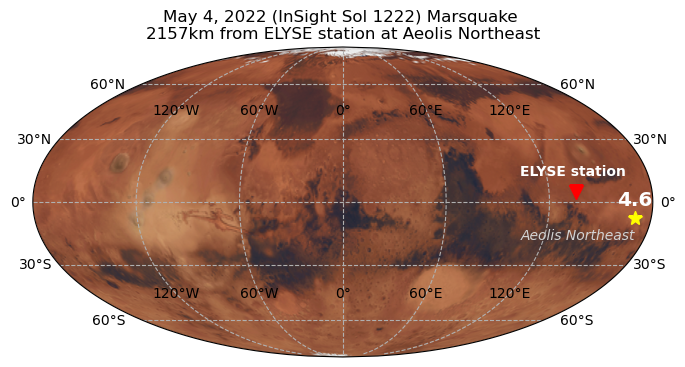

In [188]:
fig = plt.figure(figsize = (8,8))
ax  = plt.axes(projection = ccrs.Mollweide())
readname = glob.glob('mars_stellarium.png')[0]
img = plt.imread(readname)
ax.gridlines(draw_labels=True, linestyle="--")
ax.imshow(img, origin='upper', extent=[-180, 180, -90, 90], transform=ccrs.PlateCarree(), 
          interpolation='spline36', regrid_shape=4000)
ax.set_title('May 4, 2022 (InSight Sol 1222) Marsquake \n' + str(Dkm) + 'km from ELYSE station at ' + QUAKE_label)

plt.plot([ELYSE_lon], [ELYSE_lat],
         color='red', markersize=10, marker='v',
         transform=ccrs.Geodetic(),
         )

plt.plot([QUAKE_lon], [QUAKE_lat],
         color='yellow', markersize=10, marker='*',
         transform=ccrs.Geodetic(),
         )

plt.text(ELYSE_lon, ELYSE_lat + 8, ELYSE_label,
         color='white',
         fontweight='semibold',
         horizontalalignment='center',
         transform=ccrs.Geodetic())

plt.text(QUAKE_lon + 4, QUAKE_lat - 10, QUAKE_label,
         color='lightgray',
         fontweight='light',
         fontstyle='italic',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(QUAKE_lon - 1, QUAKE_lat + 6, QUAKE_mag,
         color='white',
         fontweight='bold',
         fontsize= 'x-large',
         horizontalalignment='center',
         transform=ccrs.Geodetic())

plt.show()